In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker  # For fine control over ticks
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from adjustText import adjust_text
from scipy import stats

from smbh_corona.plot_utils import nice_fonts       # Import the nice_fonts settings
matplotlib.rcParams.update(nice_fonts)
plt.rcParams['figure.dpi'] = 120        # Default is 100, this gives slightly more dpi

## Make a dictionary with the parameters of each source

In [2]:
Lsun = 3.839e33 # erg/s

# Define the sources and their properties (with short names, easier for plotting)
sources = {
    'GRS1734': {'r_c': 150, 'r_c_err': 40, 'log_delta': -1.74, 'log_delta_err': 0.13, 'B': 20, 'B_err': 4, 'sigma': 0.015, 'sigma_err': 0.002, 'con': False, 'nu_p':130, 'nu_p_err':14, 'S_p':0.91, 'S_p_err':0.11, 'L_c':4e39, 'L_X':8e43, 'L_AGN':2.71e45, 'L_AGN_err':(1.14e45, 1.91e45), 'lambda_edd':0.004, 'L_IR':np.nan, 'logM':7.84, 'logM_err':0.15},
    'IC4329A': {'r_c': 260, 'r_c_err': 80, 'log_delta': -2.4, 'log_delta_err': 0.4, 'B': 9.3, 'B_err': 2, 'sigma': 0.06, 'sigma_err': 0.01, 'con': False, 'nu_p':89.5, 'nu_p_err':19.7, 'S_p':4.2, 'S_p_err':1.1, 'L_c':7e39, 'L_X':2e44, 'L_AGN':2.71e45, 'L_AGN_err':(1.14e45, 1.91e45), 'lambda_edd':0.018, 'L_IR':np.nan, 'logM':7.83, 'logM_err':0.07},
    'MCG-6-30-15': {'r_c': 118, 'r_c_err': 7, 'log_delta': -1.97, 'log_delta_err': 0.07, 'B': 20.9, 'B_err': 2.0, 'sigma': 0.037, 'sigma_err': 0.004, 'con': False, 'nu_p':133, 'nu_p_err':7, 'S_p':0.68, 'S_p_err':0.05, 'L_c':7e38, 'L_X':8e42, 'L_AGN':6.32e43, 'L_AGN_err':(2.44e43, 6.32e43), 'lambda_edd':0.003, 'L_IR':10**43.8, 'logM':7.3, 'logM_err':0.2},
    'NGC985': {'r_c': 122, 'r_c_err': 23, 'log_delta': -2.03, 'log_delta_err': 0.2, 'B': 14.4, 'B_err': 1.6, 'sigma': 0.014, 'sigma_err': 0.002, 'con': False, 'nu_p':100, 'nu_p_err':15, 'S_p':1.4, 'S_p_err':0.2, 'L_c':3.7e40, 'L_X':3e44, 'L_AGN':2.71e45, 'L_AGN_err':(1.14e45, 1.91e45), 'lambda_edd':0.011, 'L_IR':np.nan, 'logM':8.34, 'logM_err':0.3},
    'NGC1068': {'r_c': 67.5, 'r_c_err': 5.5, 'log_delta': -0.99, 'log_delta_err': 0.13, 'B': 155, 'B_err': 8.0, 'sigma': 1.1, 'sigma_err': 0.1, 'con': False, 'nu_p':566, 'nu_p_err':55, 'S_p':10.3, 'S_p_err':1.8, 'L_c':4.4e39, 'L_X':2.3e43, 'L_AGN':4.59e43, 'L_AGN_err':(2.83e43, 7.28e43), 'lambda_edd':0.011, 'L_IR':0.78e11*Lsun, 'logM':7.22, 'logM_err':0.004},
    'NGC3227': {'r_c': 78, 'r_c_err': 37, 'log_delta': -2.03, 'log_delta_err': 0.53, 'B': 46, 'B_err': 7, 'sigma': 0.088, 'sigma_err': 0.01, 'con': False, 'nu_p':233, 'nu_p_err':99, 'S_p':0.94, 'S_p_err':0.48, 'L_c':3.4e38, 'L_X':9e42, 'L_AGN':2.71e45, 'L_AGN_err':(1.14e45, 1.91e45), 'lambda_edd':0.004, 'L_IR':np.nan, 'logM':7.2, 'logM_err':0.5},
}

# Extract data for plotting
names = list(sources.keys())
r_c_values = [sources[name]['r_c'] for name in names]
r_c_errors = [sources[name]['r_c_err'] for name in names]
log_delta_values = [sources[name]['log_delta'] for name in names]
log_delta_errors = [sources[name]['log_delta_err'] for name in names]
B_values = [sources[name]['B'] for name in names]
B_errors = [sources[name]['B_err'] for name in names]
sigma_values = [sources[name]['sigma'] for name in names]
sigma_errors = [sources[name]['sigma_err'] for name in names]
con_flags = [sources[name]['con'] for name in names]
nu_p_values = [sources[name]['nu_p'] for name in names]
nu_p_errors = [sources[name]['nu_p_err'] for name in names]
S_p_values = [sources[name]['S_p'] for name in names]
S_p_errors = [sources[name]['S_p_err'] for name in names]
logM_values = [sources[name]['logM'] for name in names]
logM_errors = [sources[name]['logM_err'] for name in names]

## Plots $r_c$ vs $\log{\delta}$

In [3]:
r_c_values_RQ = [sources[name]['r_c'] for name in names if not sources[name]['con']]
r_c_errors_RQ = [sources[name]['r_c_err'] for name in names if not sources[name]['con']]
log_delta_values_RQ = [sources[name]['log_delta'] for name in names if not sources[name]['con']]
log_delta_errors_RQ = [sources[name]['log_delta_err'] for name in names if not sources[name]['con']]
B_values_RQ = [sources[name]['B'] for name in names if not sources[name]['con']]
B_errors_RQ = [sources[name]['B_err'] for name in names if not sources[name]['con']]
sigma_values_RQ = [sources[name]['sigma'] for name in names if not sources[name]['con']]
sigma_errors_RQ = [sources[name]['sigma_err'] for name in names if not sources[name]['con']]

# Calculate average values
avg_r_c_RQ = np.mean(r_c_values_RQ)
avg_log_delta_RQ = np.mean(log_delta_values_RQ)
avg_B_RQ = np.median(B_values_RQ)
avg_sigma_RQ = np.median(sigma_values)
print(f"Mean r_c = {avg_r_c_RQ:.2f}")
print(f"Mean log_delta = {avg_log_delta_RQ:.2f}")
print(f"Median B = {avg_B_RQ:.2f}")
print(f"Median sigma = {avg_sigma_RQ:.2f}")

Mean r_c = 132.58
Mean log_delta = -1.86
Median B = 20.45
Median sigma = 0.05


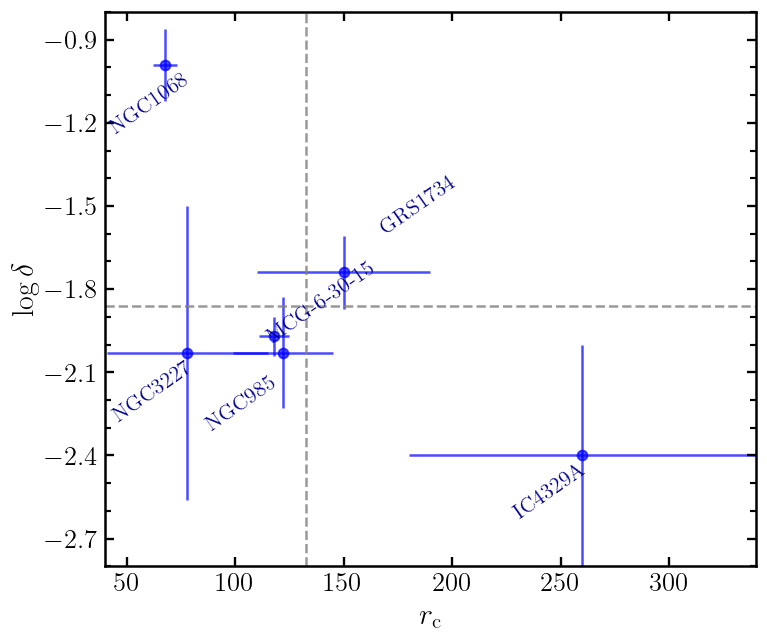

In [4]:
# Create the plot
fig, ax = plt.subplots(figsize=(7, 6),dpi=120)

# Add labels and title
plt.xlabel(r'$r_\mathrm{c}$')
plt.ylabel(r'$\log \delta$')

xmin, xmax = 40, 340 
ymin, ymax = -2.8, -0.8 
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Plot dashed lines for average values
plt.axvline(avg_r_c_RQ, color='gray', linestyle='--', label=f'Avg $r_c$: {avg_r_c_RQ:.2f}', alpha=0.8)
plt.axhline(avg_log_delta_RQ, color='gray', linestyle='--', label=f'Avg $\\log \\delta$: {avg_log_delta_RQ:.2f}', alpha=0.8)

# Scatter plot with error bars
texts = []
for i, name in enumerate(names):
    if not con_flags[i]: 
        fmt = 'bo'
        text_color = 'darkblue'

        # Plot the error bar
        plt.errorbar(r_c_values[i], log_delta_values[i], xerr=r_c_errors[i], yerr=log_delta_errors[i], fmt=fmt, alpha=0.7, zorder=1)
    
        # Add the text label with the appropriate colour
        text = plt.text(r_c_values[i], log_delta_values[i], name, fontsize=13, ha='center', va='center', rotation=35, color=text_color, zorder=5)
        texts.append(text)


adjust_text(
    texts,
    expand_points=(1.2, 1.2),    # Lower values keep labels closer to points
    expand_text=(1.2, 1.2),      # Adjust text expansion to be closer
    force_text=(0.5, 0.5),       # Strength to keep labels from overlapping each other
)

# Set major and minor y-ticks 
ax.yaxis.set_major_locator(MultipleLocator(0.3))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(direction='in', which='both', right=True, top=True)

plt.savefig(f"plot_r_vs_delta_non-CONs.pdf", bbox_inches='tight', pad_inches = 0.01)

plt.show()

## Plot $M_\mathrm{BH}$ vs $\nu_\mathrm{p}$

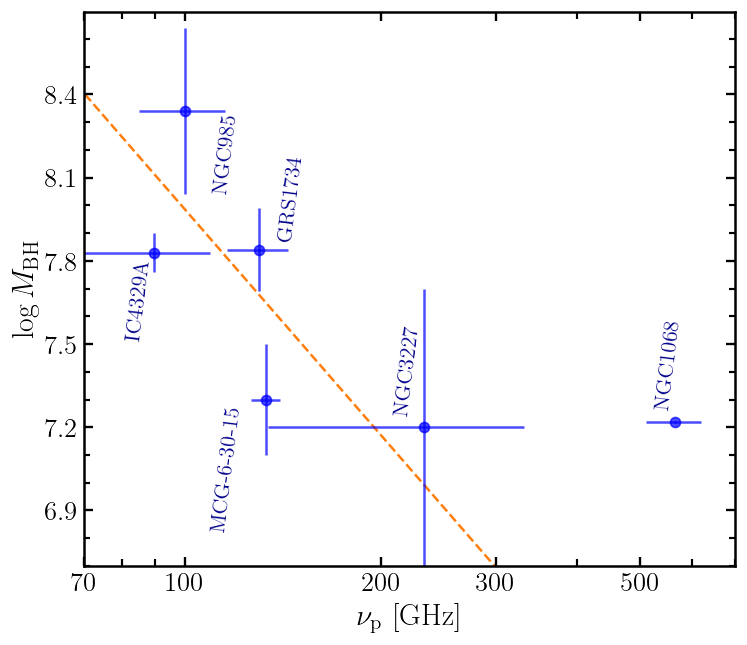

In [5]:
# Create the plot
fig, ax = plt.subplots(figsize=(7, 6),dpi=120)

# Add labels and title
plt.xlabel(r'$\nu_\mathrm{p}$~[GHz]')
plt.ylabel(r'$\log{M_\mathrm{BH}}$')

xmin, xmax = 69.99, 700 
ymin, ymax = 6.7, 8.699
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Plot the linear relation: log_nu = -0.37 * log_M + constant # from the fit
logMs = np.linspace(6.5, 8.75, 4) 
nus = 10**(-0.37 * logMs) * 0.9e5 #1.24e5
plt.plot(nus, logMs, color="C1", linestyle="--", zorder=1) 

# Scatter plot with error bars
texts = []
for i, name in enumerate(names):
    if not con_flags[i]: 
        fmt = 'bo'
        text_color = 'darkblue'
        
        # Plot the error bar
        plt.errorbar(nu_p_values[i], logM_values[i], xerr=nu_p_errors[i], yerr=logM_errors[i], fmt=fmt, alpha=0.7, zorder=2)
    
        # Add the text label with the appropriate colour
        text = plt.text(nu_p_values[i], logM_values[i], name, fontsize=13, ha='center', va='center', rotation=83, color=text_color, zorder=4)
        texts.append(text)


adjust_text(
    texts,
    expand_points=(1.2, 1.2),    # Lower values keep labels closer to points
    expand_text=(1.2, 1.2),      # Adjust text expansion to be closer
    force_text=(0.8, 0.8),       # Strength to keep labels from overlapping each other
)

plt.xscale("log")

# Define custom tick locations and labels
xticks = [70, 100, 200, 300, 500]
plt.xticks(xticks, labels=[str(x) for x in xticks])

# Set major and minor y-ticks 
ax.yaxis.set_major_locator(MultipleLocator(0.3))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(direction='in', which='both', right=True, top=True)

plt.savefig(f"plot_nup_vs_MBH_non-CONs.pdf", bbox_inches='tight', pad_inches = 0.01)

plt.show()